In [1]:
import sys
sys.path.append("..")
from utility import utility as util
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
percs = [25, 50, 75, 100]

baseline_d = {}
tau1_online_d = {}
tau3_online_d = {}

baseline_d['0'] = util.load_result('../w_mc_results/laxity_mapping/tau_1_contract_online_algo_revenue_original_0_run1')

for perc in percs:
    baseline_d[str(perc)] = util.load_result('../w_mc_results/baseline_revenue_'+str(perc))

In [3]:
def read_results_dict(taus, percs, kappa, gamma, res_type, str_fmt, directory = '../w_mc_results/contract_no_solar/',
                      columns = ["tau", "perc", "kappa", "gamma", "revenue", "participation", "type"] , pad = False):
    l_results = []
    for tau in taus:
        for perc in percs:
            temp_dict = {}
            file_str = str_fmt.replace('<tau>', str(tau)).replace('<perc>', str(perc))
            try: 
                temp_dict[str(perc)] = util.load_result(directory + file_str)
                revenue = np.sum(temp_dict[str(perc)][f"total_revenue_{perc}_run0_E"])
                participation = np.sum(temp_dict[str(perc)][f"num_v2g_evs_w_contract_lst_{perc}_run0_E"])
                l_results.append([tau, perc, kappa, gamma, revenue, participation, res_type])
            except Exception:
                if pad:
                    l_results.append([tau, perc, kappa, gamma, np.nan, np.nan, res_type])
                print(f"File {tau=} {perc=} \"{file_str}\" not found")
    df_sched = pd.DataFrame(data = l_results, columns = columns)
    df_sched = df_sched.sort_values(by = ["tau", "perc"]).reset_index(drop = True)
    return df_sched            

In [4]:
df_saidur = read_results_dict([1,3], [25,50,75,100], 0.1, 1/160, "saidur_laxity_map", "tau_<tau>_contract_online_algo_revenue_original_<perc>_run1",
                  directory = '../w_mc_results/laxity_mapping/')

df_saidur.head(20)

,tau,perc,kappa,gamma,revenue,participation,type
0,1,25,0.1,0.00625,21470.128911,830,saidur_laxity_map
1,1,50,0.1,0.00625,22636.760866,1670,saidur_laxity_map
2,1,75,0.1,0.00625,23724.247503,2511,saidur_laxity_map
3,1,100,0.1,0.00625,24829.116621,3343,saidur_laxity_map
4,3,25,0.1,0.00625,21708.806387,645,saidur_laxity_map
5,3,50,0.1,0.00625,23066.657560,1233,saidur_laxity_map
6,3,75,0.1,0.00625,24460.470736,1915,saidur_laxity_map
7,3,100,0.1,0.00625,25761.390664,2549,saidur_laxity_map


In [5]:
l_baseline = np.array([np.sum(baseline_d['0']['total_revenue_0_run0_E'])] * 4)

## Saidur's figure

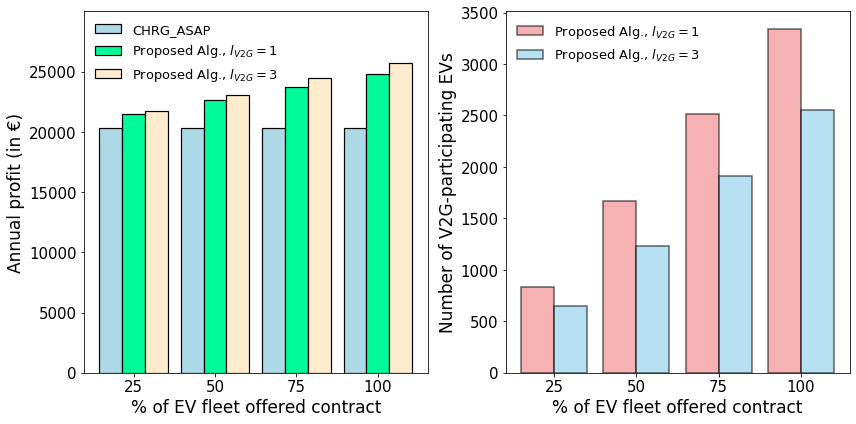

In [6]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

barwidth1 = 7
fontsize = 15

l_tau1 = df_saidur[df_saidur["tau"] == 1]["revenue"]
l_tau3 = df_saidur[df_saidur["tau"] == 3]["revenue"]
ax1.bar(np.add(percs,-barwidth1), l_baseline, color = 'lightblue',     edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'CHRG_ASAP')
ax1.bar(percs,                    l_tau1,     color = 'mediumspringgreen', edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 1$')
ax1.bar(np.add(percs,barwidth1),  l_tau3,     color = 'blanchedalmond',    edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 3$')

ax1.set_xticks(percs)
ax1.set_xticklabels(percs, fontsize = fontsize)

ax1.set_ylim([0, 30000])

yticks = [0, 5000, 10000, 15000, 20000, 25000]
ax1.set_yticks(yticks)
ax1.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax1.set_ylabel("Annual profit (in €)", fontsize = fontsize+2)

ax1.legend(loc = 'upper left', fontsize = fontsize-2, frameon=False)

barwidth2 = 10

l_participation_tau1 = df_saidur[df_saidur["tau"] == 1]["participation"]
l_participation_tau3 = df_saidur[df_saidur["tau"] == 3]["participation"]

ax2.bar(np.add(percs, -barwidth2/2), l_participation_tau1, color = 'lightcoral', alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Proposed Alg., $l_{V2G} = 1$')
ax2.bar(np.add(percs,  barwidth2/2), l_participation_tau3, color = 'skyblue',    alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Proposed Alg., $l_{V2G} = 3$')

ax2.set_xticks(percs)
ax2.set_xticklabels(percs, fontsize = fontsize)

yticks = np.arange(0, 3501, 500)
ax2.set_yticks(yticks)
ax2.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax2.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax2.set_ylabel("Number of V2G-participating EVs", fontsize = fontsize+2)

ax2.legend(loc = 'upper left', fontsize = fontsize-2, frameon=False)
fig1.tight_layout()

In [7]:
percs2 = [25]

tau1_online_d2 = {}

for perc in percs2:
    tau1_online_d2[str(perc)] = util.load_result('../w_mc_results/laxity_mapping/tau_1_contract_online_algo_revenue_original_'+str(perc)+'_run1')
#print(np.sum(tau1_online_d['25']['total_revenue_25_run0_E']))
print(np.sum(tau1_online_d2['25']['total_revenue_25_run0_E']))

tau1_online_d3 = {}
tau1_online_d3[str(25)] = util.load_result('../w_mc_results/contract_no_solar/tau_1_contract_online_algo_revenue_original_25_future_tau1_run1')
print(np.sum(tau1_online_d3['25']['total_revenue_25_run0_E']))

21470.128911270367
21380.71380141054


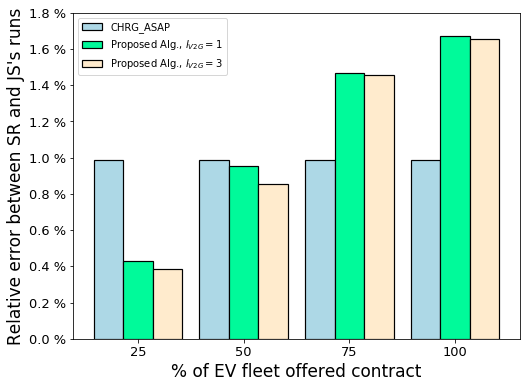

In [8]:
# Saidur's results 
said_baseline = np.array([20164.29176681928] * 4)
said_tau1 = np.array([21378.284881270265, 22420.43810359938, 23375.948647071407, 24413.62879326804])
said_tau3 = np.array([21625.333308698857,  22869.004529702368,  24104.399382594518, 25334.664529399437])

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)

diff_baseline = np.divide(l_baseline - said_baseline, l_baseline)
diff_tau1 = np.divide(l_tau1 - said_tau1, l_tau1)
diff_tau3 = np.divide(l_tau3 - said_tau3, l_tau3)

barwidth1 = 7
fontsize = 15

ax1.bar(np.add(percs,-barwidth1), diff_baseline, color = 'lightblue',     edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'CHRG_ASAP')
ax1.bar(percs,                    diff_tau1,     color = 'mediumspringgreen', edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 1$')
ax1.bar(np.add(percs,barwidth1),  diff_tau3,     color = 'blanchedalmond',    edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 3$')

yticks = ax1.get_yticks()
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"{(ytick*100):.1f} %" for ytick in yticks], fontsize = fontsize-2)
ax1.set_ylabel("Relative error between SR and JS's runs", fontsize = fontsize+2)
ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)

ax1.set_xticks(percs)
ax1.set_xticklabels(percs, fontsize = fontsize-2)

ax1.legend(loc = 'upper left')

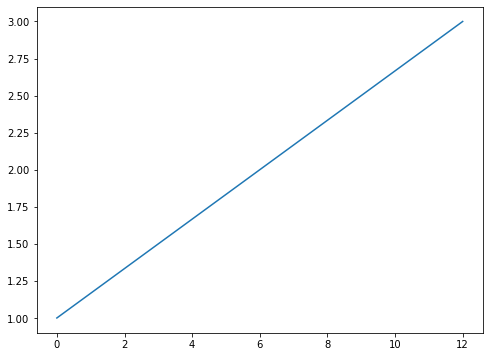

In [9]:
# Check range of laxity mapping
lax_max = 12
lax_min = 0
lax_x = np.linspace(0, lax_max, 20)                     
y_types = ((lax_x - lax_min) *  ((3 - 1)/(lax_max - lax_min))) + 1

fig1 = plt.figure(figsize = (8,6))
ax1 = fig1.add_subplot()
ax1.plot(lax_x, y_types)

## No laxity mapping

In [10]:
df_nolax = read_results_dict([1,3], [25,50,75,100], 0.1, 1/160, "uniform_old_values_123", "tau_<tau>_contract_online_algo_revenue_original_<perc>",
                  directory = '../w_mc_results/contract_no_solar/')
df_nolax.head(20)

,tau,perc,kappa,gamma,revenue,participation,type
0,1,25,0.1,0.00625,21340.985241,504,uniform_old_values_123
1,1,50,0.1,0.00625,22379.171053,995,uniform_old_values_123
2,1,75,0.1,0.00625,23412.152255,1512,uniform_old_values_123
3,1,100,0.1,0.00625,24376.934051,2011,uniform_old_values_123
4,3,25,0.1,0.00625,21420.956751,341,uniform_old_values_123
5,3,50,0.1,0.00625,22505.076521,648,uniform_old_values_123
6,3,75,0.1,0.00625,23548.526201,979,uniform_old_values_123
7,3,100,0.1,0.00625,24595.418407,1315,uniform_old_values_123


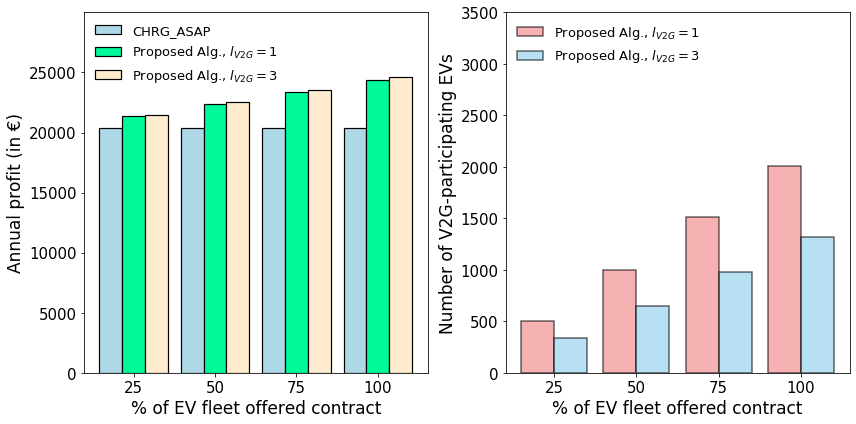

In [11]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

barwidth1 = 7
fontsize = 15

nolax_tau1 = df_nolax[df_nolax["tau"] == 1]["revenue"]
nolax_tau3 = df_nolax[df_nolax["tau"] == 3]["revenue"]
nolax_participation_tau1 = df_nolax[df_nolax["tau"] == 1]["participation"]
nolax_participation_tau3 = df_nolax[df_nolax["tau"] == 3]["participation"]

ax1.bar(np.add(percs,-barwidth1), l_baseline, color = 'lightblue',     edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'CHRG_ASAP')
ax1.bar(percs,                    nolax_tau1, color = 'mediumspringgreen', edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 1$')
ax1.bar(np.add(percs,barwidth1),  nolax_tau3, color = 'blanchedalmond',    edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 3$')

ax1.set_xticks(percs)
ax1.set_xticklabels(percs, fontsize = fontsize)

ax1.set_ylim([0, 30000])

yticks = [0, 5000, 10000, 15000, 20000, 25000]
ax1.set_yticks(yticks)
ax1.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax1.set_ylabel("Annual profit (in €)", fontsize = fontsize+2)

ax1.legend(loc = 'upper left', fontsize = fontsize-2, frameon=False)

barwidth2 = 10

ax2.bar(np.add(percs, -barwidth2/2), nolax_participation_tau1, color = 'lightcoral', alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Proposed Alg., $l_{V2G} = 1$')
ax2.bar(np.add(percs,  barwidth2/2), nolax_participation_tau3, color = 'skyblue',    alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Proposed Alg., $l_{V2G} = 3$')

ax2.set_xticks(percs)
ax2.set_xticklabels(percs, fontsize = fontsize)

yticks = np.arange(0, 3501, 500)
ax2.set_yticks(yticks)
ax2.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax2.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax2.set_ylabel("Number of V2G-participating EVs", fontsize = fontsize+2)

ax2.legend(loc = 'upper left', fontsize = fontsize-2, frameon=False)
fig1.tight_layout()

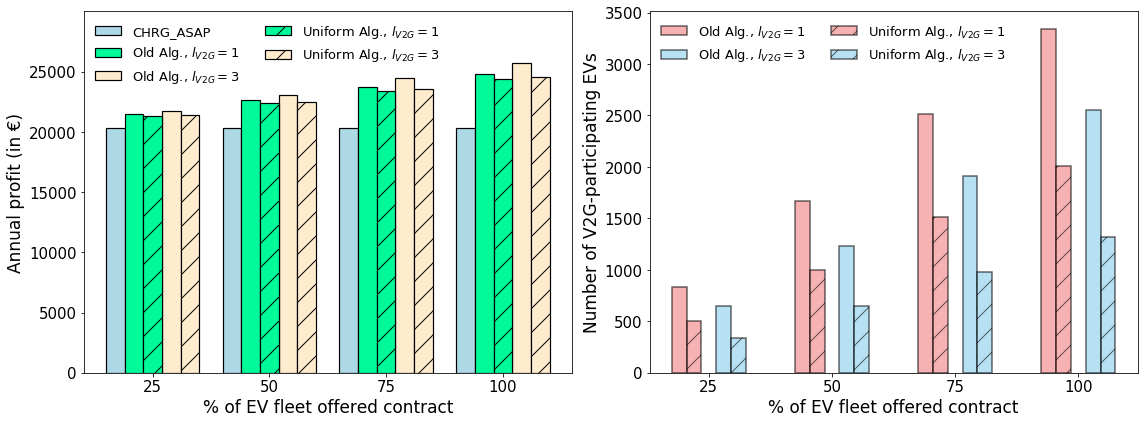

In [12]:
# Comparing lax and no lax
fig1 = plt.figure(figsize=(16,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

barwidth1 = 4
fontsize = 15

ax1.bar(np.add(percs,-barwidth1*2), l_baseline, color = 'lightblue',     edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'CHRG_ASAP')
ax1.bar(np.add(percs,-barwidth1), l_tau1, color = 'mediumspringgreen', edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Old Alg., $l_{V2G} = 1$')
ax1.bar(np.add(percs,barwidth1),  l_tau3, color = 'blanchedalmond',    edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Old Alg., $l_{V2G} = 3$')
ax1.bar(percs,                    nolax_tau1, color = 'mediumspringgreen', edgecolor = 'black', linewidth = 1.2, width = barwidth1, hatch = '/', label = r'Uniform Alg., $l_{V2G} = 1$')
ax1.bar(np.add(percs,barwidth1*2),  nolax_tau3, color = 'blanchedalmond',    edgecolor = 'black', linewidth = 1.2, width = barwidth1, hatch = '/', label = r'Uniform Alg., $l_{V2G} = 3$')

ax1.set_xticks(percs)
ax1.set_xticklabels(percs, fontsize = fontsize)

ax1.set_ylim([0, 30000])

yticks = [0, 5000, 10000, 15000, 20000, 25000]
ax1.set_yticks(yticks)
ax1.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax1.set_ylabel("Annual profit (in €)", fontsize = fontsize+2)

ax1.legend(loc = 'upper left', fontsize = fontsize-2, frameon=False, ncol = 2)

barwidth2 = 3

ax2.bar(np.add(percs, -barwidth2*2), l_participation_tau1, color = 'lightcoral', alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Old Alg., $l_{V2G} = 1$')
ax2.bar(np.add(percs,  barwidth2), l_participation_tau3, color = 'skyblue',    alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Old Alg., $l_{V2G} = 3$')
ax2.bar(np.add(percs, -barwidth2), nolax_participation_tau1, color = 'lightcoral', alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, hatch = '/', label = r'Uniform Alg., $l_{V2G} = 1$')
ax2.bar(np.add(percs,  barwidth2*2), nolax_participation_tau3, color = 'skyblue',    alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, hatch = '/', label = r'Uniform Alg., $l_{V2G} = 3$')


ax2.set_xticks(percs)
ax2.set_xticklabels(percs, fontsize = fontsize)

yticks = np.arange(0, 3501, 500)
ax2.set_yticks(yticks)
ax2.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax2.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax2.set_ylabel("Number of V2G-participating EVs", fontsize = fontsize+2)

ax2.legend(loc = 'upper left', fontsize = fontsize-2, frameon=False, ncol = 2)

fig1.tight_layout()

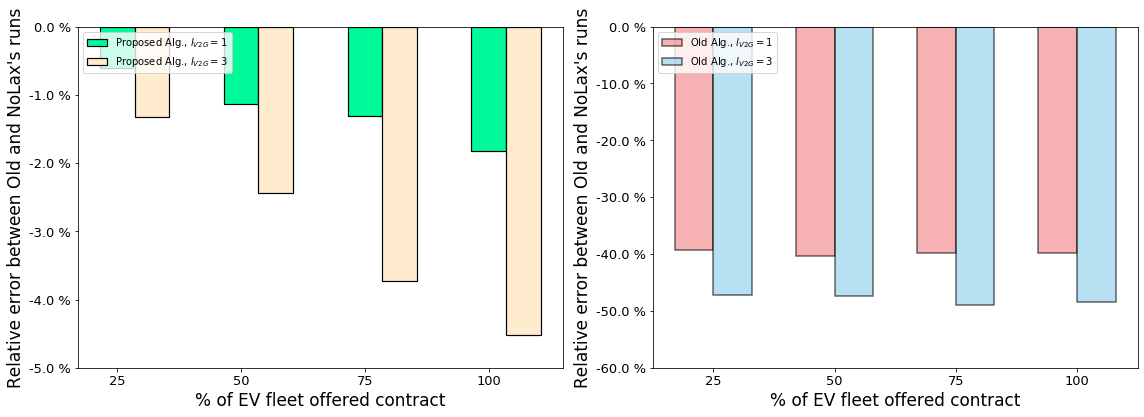

In [13]:
# Nolax's results 
fig1 = plt.figure(figsize=(16,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

#diff_baseline = np.divide(l_baseline - said_baseline, l_baseline)
diff_tau1 = np.divide(nolax_tau1 - l_tau1, l_tau1 )
diff_tau3 = np.divide(nolax_tau3 - l_tau3, l_tau3 )

barwidth1 = 7
fontsize = 15

#ax1.bar(np.add(percs,-barwidth1), diff_baseline, color = 'lightblue',     edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'CHRG_ASAP')
ax1.bar(percs,                    diff_tau1,     color = 'mediumspringgreen', edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 1$')
ax1.bar(np.add(percs,barwidth1),  diff_tau3,     color = 'blanchedalmond',    edgecolor = 'black', linewidth = 1.2, width = barwidth1, label = r'Proposed Alg., $l_{V2G} = 3$')

yticks = ax1.get_yticks()
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"{(ytick*100):.1f} %" for ytick in yticks], fontsize = fontsize-2)
ax1.set_ylabel("Relative error between Old and NoLax's runs", fontsize = fontsize+2)
ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax1.set_xticks(percs)
ax1.set_xticklabels(percs, fontsize = fontsize-2)

ax1.legend(loc = 'upper left')

barwidth2 = 8

diff_part1 = np.divide(nolax_participation_tau1 - l_participation_tau1, l_participation_tau1)
diff_part3 = np.divide(nolax_participation_tau3 - l_participation_tau3, l_participation_tau3)

ax2.bar(np.add(percs, -barwidth2/2), diff_part1, color = 'lightcoral', alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Old Alg., $l_{V2G} = 1$')
ax2.bar(np.add(percs,  barwidth2/2), diff_part3, color = 'skyblue',    alpha = 0.6, edgecolor = 'black', linewidth = 1.5, width = barwidth2, label = r'Old Alg., $l_{V2G} = 3$')


ax2.set_ylabel("Relative error between Old and NoLax's runs", fontsize = fontsize+2)
ax2.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)

yticks = ax2.get_yticks()
ax2.set_yticks(yticks)
ax2.set_yticklabels([f"{(ytick*100):.1f} %" for ytick in yticks], fontsize = fontsize-2)
ax2.set_xticks(percs)
ax2.set_xticklabels(percs, fontsize = fontsize-2)
ax2.legend(loc = 'upper left')
fig1.tight_layout()

In [14]:
print(l_tau1)
print(nolax_tau1)

0    21470.128911
1    22636.760866
2    23724.247503
3    24829.116621
Name: revenue, dtype: float64
0    21340.985241
1    22379.171053
2    23412.152255
3    24376.934051
Name: revenue, dtype: float64


## New contracts - future values

In [15]:
sched_results = []

taus = [1,2,3]
percs = [25, 50, 75, 100]
kappa = 0.2
gamma = 0.01

df_future = read_results_dict([1,2,3], [25,50,75,100], 0.2, 0.01, "future",
                             "tau_1_contract_online_algo_revenue_original_<perc>_future_tau<tau>_run1",
                             directory = '../w_mc_results/snowball_res/')
df_future.describe()

,tau,perc,kappa,gamma,revenue,participation
count,12.000000,12.00000,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,2.000000,62.50000,2.000000e-01,1.000000e-02,23613.770126,1099.166667
std,0.852803,29.19371,2.898975e-17,1.811860e-18,1323.823024,561.374423
min,1.000000,25.00000,2.000000e-01,1.000000e-02,21829.840958,375.000000
25%,1.000000,43.75000,2.000000e-01,1.000000e-02,22588.720832,677.000000
50%,2.000000,62.50000,2.000000e-01,1.000000e-02,23557.988390,1091.000000
75%,3.000000,81.25000,2.000000e-01,1.000000e-02,24612.632331,1508.000000
max,3.000000,100.00000,2.000000e-01,1.000000e-02,25816.381117,2190.000000


In [16]:
sched_results = []

taus = [1,2,3]
percs = [25, 50, 75, 100]
kappa = 0.2
gamma = 0.01

df_future = read_results_dict([1,2,3], [25,50,75,100], 0.2, 0.01, "future",
                             "tau_1_contract_online_algo_revenue_original_<perc>_future_tau<tau>_run2",
                             directory = '../w_mc_results/snowball_res/', pad = True)

df_futureshort = read_results_dict([1,2,3], [25,50,75,100], 0.2, 0.01, "futureshort",
                             "tau_1_contract_online_algo_revenue_original_<perc>_futureshort_tau<tau>",
                             directory = '../w_mc_results/snowball_res/', pad = True)

df_baseline = read_results_dict([1], [0], 0.2, 0.01, "future",
                             "tau_1_contract_online_algo_revenue_original_<perc>_future_tau<tau>_run2",
                             directory = '../w_mc_results/snowball_res/', pad = True)
l_baseline2 = [df_baseline["revenue"].iloc[0]]*4
print(l_baseline)
print(l_baseline2)
df_future = df_futureshort
df_future.describe()

[20365.06134719 20365.06134719 20365.06134719 20365.06134719]
[20875.625786088298, 20875.625786088298, 20875.625786088298, 20875.625786088298]


,tau,perc,kappa,gamma,revenue,participation
count,12.000000,12.00000,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,2.000000,62.50000,2.000000e-01,1.000000e-02,22866.680974,1356.666667
std,0.852803,29.19371,2.898975e-17,1.811860e-18,1368.331857,631.645662
min,1.000000,25.00000,2.000000e-01,1.000000e-02,21013.504894,558.000000
25%,1.000000,43.75000,2.000000e-01,1.000000e-02,21804.098830,930.000000
50%,2.000000,62.50000,2.000000e-01,1.000000e-02,22812.676693,1359.500000
75%,3.000000,81.25000,2.000000e-01,1.000000e-02,23887.849741,1766.750000
max,3.000000,100.00000,2.000000e-01,1.000000e-02,25195.787522,2183.000000


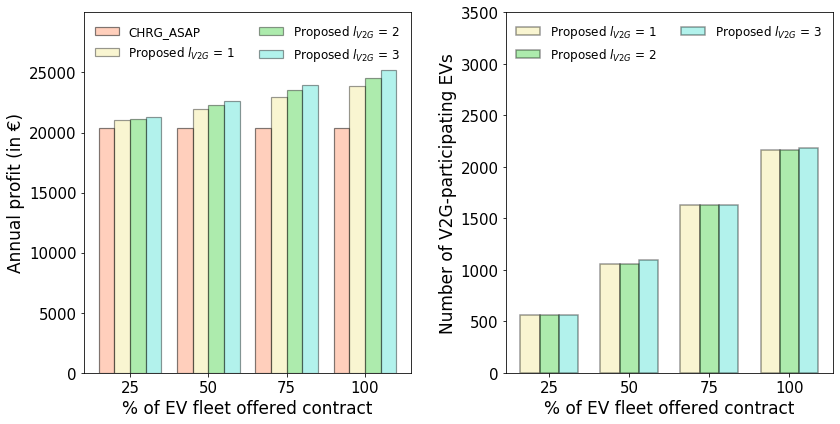

In [17]:
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)


barwidth1 = 5
barwidth2 = 6
fontsize = 15

colors = ["lightsalmon", "khaki", "limegreen", "turquoise", "green", "red"]

num_bars = len(taus)

x = np.add(percs, barwidth1 * (-num_bars//2 + 0.5))
ax1.bar(x, l_baseline, color = colors[0], edgecolor = "k", lw = 1.2, alpha = 0.5, width = barwidth1, label = r"CHRG_ASAP")

for i, (tau, color) in enumerate(zip(taus,colors[1:])):
    x_rev = np.add(percs, barwidth1 * (i - num_bars//2 + 0.5) )
    x_par = np.add(percs, barwidth2 * (i - num_bars//2 ) )
    y_rev = df_future[df_future["tau"] == tau]["revenue"]
    y_par = df_future[df_future["tau"] == tau]["participation"]
    
    ax1.bar(x_rev, y_rev, color = color, edgecolor = "k", lw = 1.2, alpha = 0.4, width = barwidth1, label = r'Proposed $l_{V2G}$' + f" = {tau}")
    ax2.bar(x_par, y_par, color = color, edgecolor = "k", lw = 1.5, alpha = 0.4, width = barwidth2, label = r'Proposed $l_{V2G}$' + f" = {tau}")

    
ax1.set_xticks(percs)    
ax1.set_xticklabels(percs, fontsize = fontsize)

ax2.set_xticks(percs)
ax2.set_xticklabels(percs, fontsize = fontsize)

yticks = np.arange(0, 3501, 500)
ax2.set_yticks(yticks)
ax2.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax1.set_ylim([0, 30000])
ax1.legend(loc = 'upper left', ncol = 2, fontsize = fontsize-3, frameon=False)

ax2.legend(loc = 'upper left', ncol = 2, fontsize = fontsize-3, frameon=False)

yticks = [0, 5000, 10000, 15000, 20000, 25000]
ax1.set_yticks(yticks)
ax1.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax1.set_ylabel("Annual profit (in €)", fontsize = fontsize+2)

ax2.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax2.set_ylabel("Number of V2G-participating EVs", fontsize = fontsize+2)

fig1.tight_layout()


## Future values

$\theta = [0.5, 0.75, 1, 1.25, 1.5]$Online_Algo_Original_mc_third_party_cont-tau_1.ipynb:    "            all_bids_sample_paths = util.load_result(('bids_no_solar/{}_perc'.format(perc)+'/bid_sample_path_'+str(perc)+'_perc'))\n",


In [18]:
np.std([1,2,3])

0.816496580927726

In [19]:
edf_sym = pd.DataFrame()

for run in range(1,6):
    df_temp = read_results_dict([1,2,3], [25,50,75,100], 0.2, 0.01, f"future_sym{run}",
                                 f"tau_1_contract_online_algo_revenue_original_<perc>_futuresym{run}_tau<tau>",
                                 directory = '../w_mc_results/mult_runs/')
    edf_sym = pd.concat((edf_sym, df_temp))
edf_sym.head(20)
df_sym = edf_sym.groupby(by = ["tau", "perc", "kappa", "gamma"]).agg(revenue = ("revenue", "mean"),
                                                                             revenue_std = ("revenue", np.std),
                                                                             participation = ("participation", "mean"),
                                                                             participation_std = ("participation", np.std)
                                                                            ).reset_index()
df_sym["type"] = "futuresym"
df_sym.head(20)

,tau,perc,kappa,gamma,revenue,revenue_std,participation,participation_std,type
0,1,25,0.2,0.01,21622.815151,324.929072,662.6,12.720063,futuresym
1,1,50,0.2,0.01,22625.505119,301.756044,1312.2,20.400980,futuresym
2,1,75,0.2,0.01,23678.644602,289.925686,1976.8,26.423474,futuresym
3,1,100,0.2,0.01,24670.047644,336.350761,2632.8,50.156754,futuresym
4,2,25,0.2,0.01,21820.898727,325.672820,662.6,12.720063,futuresym
5,2,50,0.2,0.01,23017.165200,314.880919,1312.2,20.400980,futuresym
6,2,75,0.2,0.01,24272.974272,290.958322,1976.8,26.423474,futuresym
7,2,100,0.2,0.01,25471.974519,362.563148,2626.0,50.729676,futuresym
8,3,25,0.2,0.01,21970.863483,319.130894,663.4,10.089599,futuresym
9,3,50,0.2,0.01,23299.511735,375.229241,1310.2,19.485892,futuresym


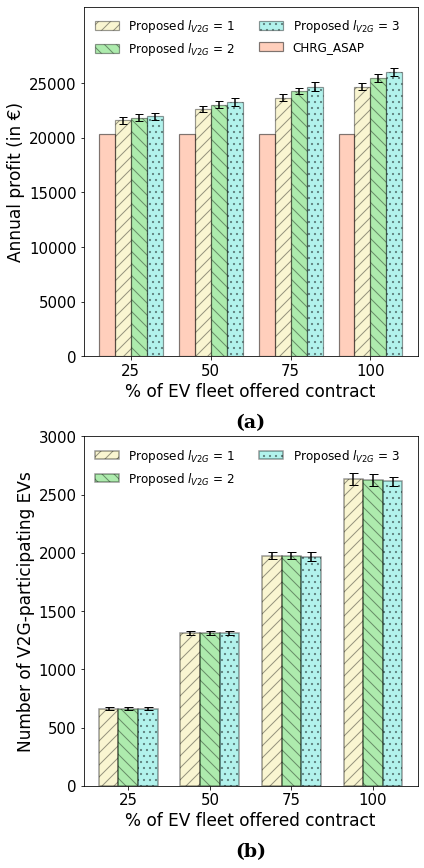

In [20]:
fig1 = plt.figure(figsize=(6,12))
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)

barwidth1 = 5
barwidth2 = 6
fontsize = 15

colors = ["lightsalmon", "khaki", "limegreen", "turquoise"]
hatches = ["", "//", "\\\\", ".."]
num_bars = len(taus)

x = np.add(percs, barwidth1 * (-num_bars//2 + 0.5))


for i, (tau, color, hatch) in enumerate(zip(taus,colors[1:], hatches[1:])):
    x_rev = np.add(percs, barwidth1 * (i - num_bars//2 + 0.5) )
    x_par = np.add(percs, barwidth2 * (i - num_bars//2 ) )
    y_rev   = df_sym[df_sym["tau"] == tau]["revenue"]
    err_rev = df_sym[df_sym["tau"] == tau]["revenue_std"]
    y_par   = df_sym[df_sym["tau"] == tau]["participation"]
    err_par = df_sym[df_sym["tau"] == tau]["participation_std"]
    label = r'Proposed $l_{V2G}$' + f" = {tau}"

    
    ax1.bar(x_rev, y_rev, yerr = err_rev, capsize = barwidth1 * 0.75, hatch = hatch, ecolor = "black", color = color, edgecolor = "k", lw = 1.2, alpha = 0.4, width = barwidth1, label = label)
    ax2.bar(x_par, y_par, yerr = err_par, capsize = barwidth2 * 0.75, hatch = hatch, ecolor = "black", color = color, edgecolor = "k", lw = 1.5, alpha = 0.4, width = barwidth2, label = label)
    
ax1.bar(x, l_baseline, color = colors[0], edgecolor = "k", lw = 1.2, alpha = 0.5, width = barwidth1, label = r"CHRG_ASAP")
    
ax1.set_xticks(percs)    
ax1.set_xticklabels(percs, fontsize = fontsize)

ax2.set_xticks(percs)
ax2.set_xticklabels(percs, fontsize = fontsize)

yticks = np.arange(0, 3001, 500)
ax2.set_yticks(yticks)
ax2.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax1.set_ylim([0, 32000])
ax1.legend(loc = 'upper left', ncol = 2, fontsize = fontsize-3, frameon=False)

ax2.legend(loc = 'upper left', ncol = 2, fontsize = fontsize-3, frameon=False)

yticks = [0, 5000, 10000, 15000, 20000, 25000]
ax1.set_yticks(yticks)
ax1.set_yticklabels([int(ytick) for ytick in yticks], fontsize = fontsize)

ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax1.set_ylabel("Annual profit (in €)", fontsize = fontsize+2)

ax2.set_ylabel("Number of V2G-participating EVs", fontsize = fontsize+2)
ax2.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)

ax1.set_title(f"(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.22)
ax2.set_title(f"(b)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.22)
fig1.tight_layout()
fig1.savefig("/home/javier/Documents/Escuela/SCRG/Refs/Contracts/Figs/fig_scheduleResults.pdf", dpi = 600)

## More experiments

In [21]:
df_future_same = read_results_dict([1,2,3], [25,50,75,100], 0.2, 0.01, "futuresame",
                             "tau_1_contract_online_algo_revenue_original_<perc>_futuresame_tau<tau>",
                             directory = '../w_mc_results/contract_no_solar/')

df_currentk03 = read_results_dict([1,2,3], [25,50,75,100], 0.3, 0.05, "current_kappa03",
                                  "tau_1_contract_online_algo_revenue_original_<perc>_currentkappa03_tau<tau>")

df_futurek03 = read_results_dict([1,2,3], [25,50,75,100], 0.3, 0.01, "future_kappa03",
                                  "tau_1_contract_online_algo_revenue_original_<perc>_futurekappa03_tau<tau>")

df_futuresamek03 = read_results_dict([1,2,3], [25,50,75,100], 0.3, 0.01, "futuresame_kappa03",
                                  "tau_1_contract_online_algo_revenue_original_<perc>_futuresamekappa03_tau<tau>")


In [22]:
df_sched=pd.concat((df_saidur, df_nolax, df_future, df_future_same, df_currentk03, df_futurek03, df_futuresamek03, df_futureshort, df_sym))
df_sched.columns

Index(['tau', 'perc', 'kappa', 'gamma', 'revenue', 'participation', 'type',
       'revenue_std', 'participation_std'],
      dtype='object')

In [23]:
df_sched["type"].unique()

array(['saidur_laxity_map', 'uniform_old_values_123', 'futureshort',
       'futuresame', 'current_kappa03', 'future_kappa03',
       'futuresame_kappa03', 'futuresym'], dtype=object)

(20000, 26000)

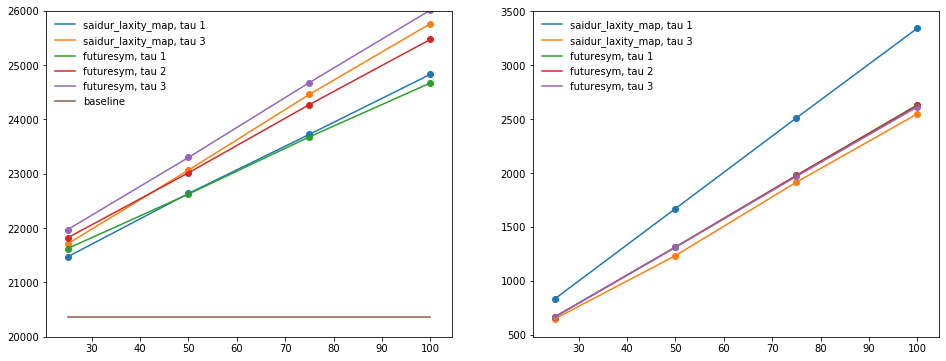

In [24]:

fig1 = plt.figure(figsize = (16,6))

ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

types = df_sched["type"].unique()

for type_exp in types:
    df_exp = df_sched[df_sched["type"] == type_exp]
    if type_exp not in ["uniform_old_values_123", "futuresame", "current_kappa03", "futuresame_kappa03", "future_kappa03", "futureshort"]:
        taus = df_exp["tau"].unique()
        for tau in taus:
            x = np.array(df_exp[df_exp["tau"] == tau]["perc"])
            y_rev = np.array(df_exp[df_exp["tau"] == tau]["revenue"])
            y_par = np.array(df_exp[df_exp["tau"] == tau]["participation"])
            ax1.plot(x,y_rev, label = f"{type_exp}, tau {tau}")
            ax1.scatter(x,y_rev)
            ax2.plot(x,y_par, label = f"{type_exp}, tau {tau}")
            ax2.scatter(x,y_par)


ax1.plot(x, l_baseline, label = "baseline")

ax1.legend(loc = "upper left", frameon = False)
ax2.legend(loc = "upper left", frameon = False)
ax1.set_ylim([20_000, 26_000])

In [25]:
df_sched.columns

Index(['tau', 'perc', 'kappa', 'gamma', 'revenue', 'participation', 'type',
       'revenue_std', 'participation_std'],
      dtype='object')

In [26]:
gdf_sched = df_sched.groupby("type").agg(revenue_avg = ("revenue", "mean"), participation_avg = ("participation", "mean")).reset_index()
gdf_sched = gdf_sched.sort_values(by = ["revenue_avg"], ascending = False).reset_index(drop = True)

Text(0, 0.5, 'Number of V2G-participating EVs')

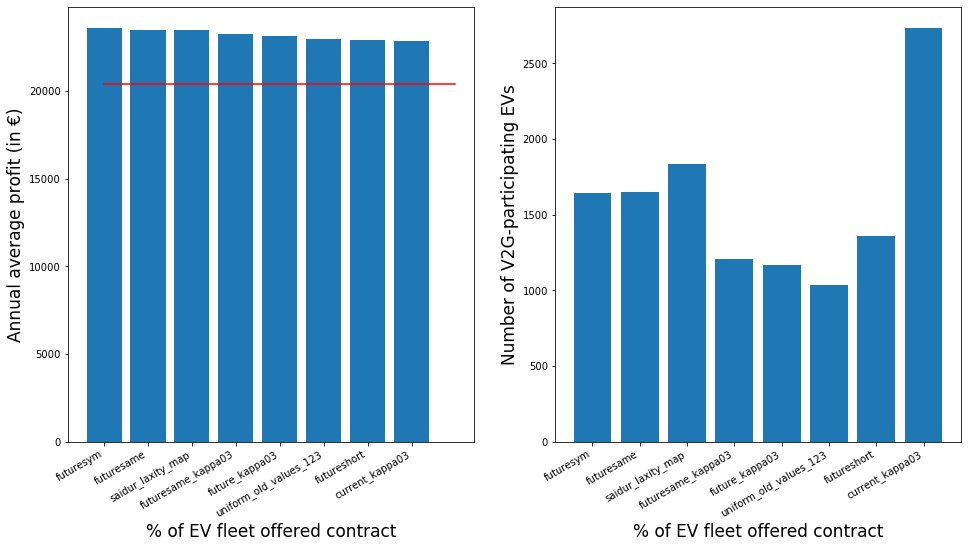

In [27]:
fig1 = plt.figure(figsize = (16,8))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

x = list(range(len(gdf_sched)))
y_rev = gdf_sched["revenue_avg"].values
y_par = gdf_sched["participation_avg"].values
x_labels = gdf_sched["type"].values

ax1.bar(x, y_rev)
ax2.bar(x, y_par)
ax1.plot([0,2,4,8], l_baseline, color = "red")
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation = 30, ha = "right", va = "top")
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels, rotation = 30, ha = "right", va = "top")


ax1.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax1.set_ylabel("Annual average profit (in €)", fontsize = fontsize+2)

ax2.set_xlabel("% of EV fleet offered contract", fontsize = fontsize+2)
ax2.set_ylabel("Number of V2G-participating EVs", fontsize = fontsize+2)
